### 10.1 퍼셉트론


#### 퍼셉트론
- Scikit-Learn 제공하는 퍼셉트론 모형 Perceptron 클래스
    - max_iter: 최적화를 위한 반복 횟수(iteration number)
    - eta0: 학습속도  η 
    - n_iter_no_change: 이 설정값만큼 반복을 해도 성능이 나아지지 않으면 max_iter 설정값과 상관없이 멈춘다.

In [3]:
%matplotlib inline

In [4]:
from matplotlib import rc

plt.style.use('seaborn')
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, :2]
y = (iris.target[idx] / 2).astype(np.int)

from sklearn.linear_model import Perceptron

def plot_perceptron(n):
    model = Perceptron(max_iter=300, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
    XX_min = X[:, 0].min() - 1
    XX_max = X[:, 0].max() + 1
    YY_min = X[:, 1].min() - 1
    YY_max = X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                         np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolor='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolor='k')
    plt.xlabel("꽃받침의 길이")
    plt.ylabel("꽃받침의 폭")
    plt.title("붓꽃 데이터(setosa/virginica)")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()


from ipywidgets import widgets
widgets.interact(plot_perceptron, n=widgets.IntSlider(min=1, max=100, step=1, value=1));


interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

In [7]:
from sklearn.metrics import confusion_matrix, classification_report

model = Perceptron(max_iter=400, shuffle=False, tol=0, n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

array([[50,  0],
       [ 0, 50]], dtype=int64)

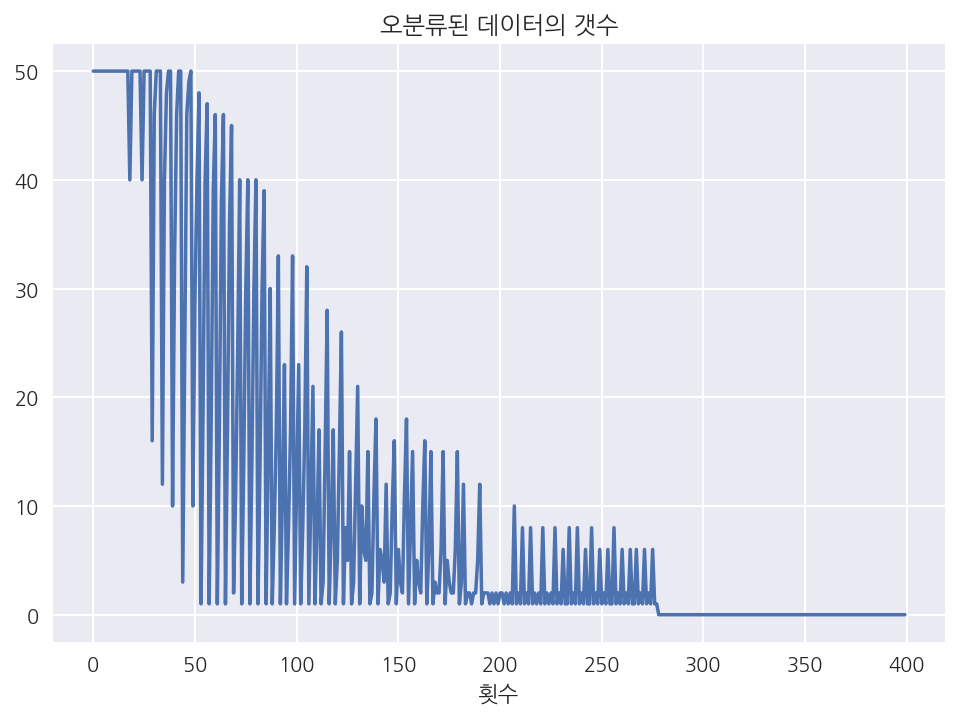

In [8]:
# 학습 성능
n = 400
loss = np.zeros(n)
model = Perceptron(warm_start=True, shuffle=False)
for i in range(n):
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))

plt.plot(loss)
plt.xlabel("횟수")
plt.title("오분류된 데이터의 갯수")
plt.show()